# No.1 Google Play Store Apps

In [327]:
import pandas as pd
df=pd.read_csv('/Users/guiguibaba/Desktop/googleplaystore.csv')

## 1.Take a glance at the data

In [328]:
#Take a look at the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [329]:
df.info()
# Find there is lots of missing values in the [Rating] column
# Installs should be convert to a clean numetric data
# Size should have the same unit, and convert to a numtric data

# Reviews should be a numetric type data
# Price should be a numetric data
# Last Updated should be converted into a standard date data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [330]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 2.Some pre-possessing

### (1).Fill the Missing Data of Column ['Rating']

In [331]:
# The number of the missing value
len(df[df['Rating'].isna()])

1474

In [332]:
# I plan to fill the missing value using the mean value of each category 
# because the genres information is not clear enough
# How many categories overall? 34,but I find a strange category called'1.9'

df['Category'].value_counts().keys()

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE',
       'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'WEATHER', 'ART_AND_DESIGN', 'EVENTS',
       'PARENTING', 'COMICS', 'BEAUTY', '1.9'],
      dtype='object')

In [333]:
# Lets take a look at this strange data
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [334]:
#It seems that the value was filled wrongly
#Lets correct it
    
df.iloc[10472]=df.iloc[10472].shift(+1)
df.loc[10472,'App']=df.loc[10472,'Category']

# I google the App and fill the category
df.loc[10472,'Category']='LIFESTYLE'

In [335]:
df['Rating']=df['Rating'].astype(np.float)

In [336]:
# Lets see how many users ratings are in each category? It seems the category is an Outlier

import matplotlib.pyplot as plt

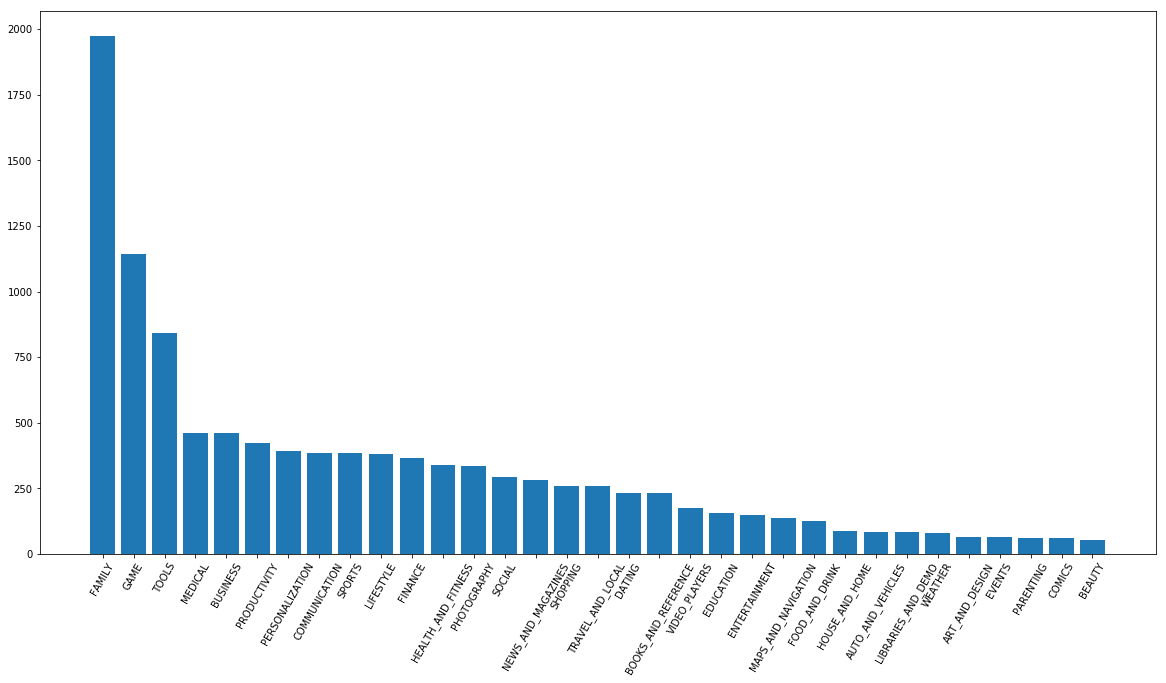

In [337]:
plt.figure(figsize=(20,10))
plt.bar(df['Category'].value_counts().keys(),df['Category'].value_counts())
plt.xticks(rotation=60)

plt.show()

In [338]:
#Lets see the average rating for each category

Cate_avg_rating=df.groupby('Category').agg(np.mean)['Rating']

In [339]:
# Now overall 33 categories
len(df['Category'].value_counts().keys())

33

In [340]:
# There are the rows with missing data
Missing_value = df[df['Rating'].isna()].index

In [341]:
# Lets fill them out

for i in Missing_value:
    category=df.iloc[i]['Category']
    df.loc[i,'Rating']=Cate_avg_rating[category]


In [342]:
# Now no missing value
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### (2). Remove the '+' and' , ' in the  Column ['Installs']

In [343]:
len(df[df['Installs'].isna()])

0

In [344]:
# We need to remove the '+' in the data

In [345]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [346]:
df['Installs'].values

array(['10,000+', '500,000+', '5,000,000+', ..., '1,000+', '1,000+',
       '10,000,000+'], dtype=object)

In [515]:
#Remove the '+'and ','
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [516]:
#I came a error when Convert the datatype from str to int
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [517]:
df['Installs'].values

array([   10000,   500000,  5000000, ...,     1000,     1000, 10000000])

### (3) Deal with different unit of columns['Size']

In [530]:
# There are values like'19M' ,'582k', and 'Varies with device'
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [ ]:
#So we have to transfer the column with 'k' to with 'M'

In [531]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))

In [533]:
df['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### (5) The column['Reviews']

In [563]:
df['Price'] = df['Price'].apply(lambda x: float(x))

### (5)Dealing the Column['Price']

In [558]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', ''))
df['Price'] = df['Price'].apply(lambda x: float(x))

### (6) The Column['Last Updated']

In [573]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [574]:
import datetime

date_time_str = 'January 7, 2018'
date_time_obj = datetime.datetime.strptime(date_time_str, '%B %d, %Y')

print('Date:', date_time_obj.date())  
print('Date-time:', date_time_obj) 

Date: 2018-01-07
Date-time: 2018-01-07 00:00:00


In [575]:
df['Last Updated'] = df['Last Updated'].apply(lambda x: datetime.datetime.strptime(x, '%B %d, %Y').date())

In [576]:
df['Last Updated'].head()

0    2018-01-07
1    2018-01-15
2    2018-08-01
3    2018-06-08
4    2018-06-20
Name: Last Updated, dtype: object